In [1]:
# Option to display plot in Jupyter notebook
%matplotlib inline

In [2]:
# Import libraries
import pandas as pd        
import networkx as nx      
import matplotlib.pyplot as plt

# csv files with trade data and country codes
source = 'data/nylon2014.csv'
codes = 'data/country_code_baci.csv'

In [3]:
# read data, match with country codes, save
df = pd.read_csv(source)
code_df = pd.read_csv(codes).set_index('i')['iso3']
df['exp'] = df['country1'].map(code_df)
df['imp'] = df['country2'].map(code_df)
data = df[['exp','imp','val_exp_ijp']]
data.to_csv('data.csv')
print data.tail()   # show last 5 observations

      exp  imp  val_exp_ijp
2267  USA  URY    40.128799
2268  USA  VEN    25.608999
2269  URY  BRA     2.043000
2270  URY  HKG    90.043999
2271  URY  USA     1.200000


In [5]:
data = data.nlargest(len(data)/2, 'val_exp_ijp')

In [6]:
G = nx.from_pandas_dataframe(data,'exp','imp',edge_attr='val_exp_ijp', create_using=nx.DiGraph())

oc = nx.out_degree_centrality(G)
nx.set_node_attributes(G, 'cent', oc)
node_color = [float(G.node[v]['cent']) for v in G]

totexp = {}
for exp in G.nodes(): 
    totexp[exp] = sum([g for exp,f,g in G.edges_iter(exp, 'val_exp_ijp')])
nx.set_node_attributes(G, 'totexp', totexp)
node_size = [(float(G.node[v]['totexp']) / sum(totexp.values())) * 10000 for v in G]

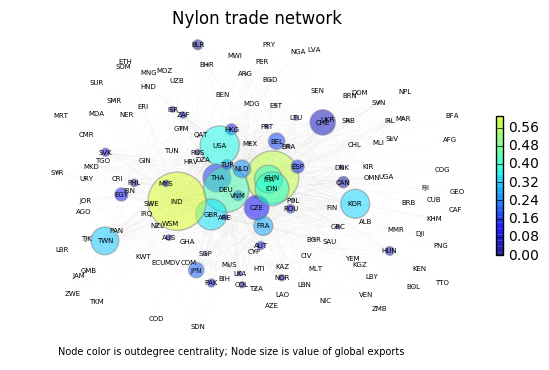

In [10]:
plt.clf()
pos = nx.spring_layout(G,k=0.20,iterations=5) 
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, node_color=node_color, \
                               alpha=0.5) 
edges = nx.draw_networkx_edges(G, pos, edge_color='lightgray', \
                               arrows=False, width=0.05,)
nx.draw_networkx_labels(G,pos,font_size=5)
nodes.set_edgecolor('gray')
plt.text(0,-0.1, \
         'Node color is outdegree centrality; Node size is value of global exports', \
         fontsize=7)
plt.title('Nylon trade network', fontsize=12)
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0, 1)
plt.margins(0,0)
plt.axis('off')
plt.savefig('nylon.png', dpi=100)

In [6]:
#data[data['exp'] == 'USA']
#G.nodes()[1]
#data['exp']
#data.isnull().values.any()
#data[data['exp'].isnull()]
#df[df['exp'].isnull()]